In [14]:
## read the file (.pairs)

In [2]:
import numpy.random as random
import numpy as np
import math
import networkx as nx
from scipy import sparse as sp
import random
import matplotlib.pyplot as plt

In [3]:

## need to fix something


def read_pairs_file(pairfile) :
    
    file = open(pairfile, "r")
    
    edges = []
    weights = []
    
    for line in file :
        nodes = line.split()
        edges.append((nodes[0], nodes[1]))
        
        #weight
        if len(nodes) == 3 :
            weights.append(float(nodes[2]))
        else :
            weights.append(1.0)
    file.close()
    
    pair_dict = {}
    t_num = 0 
    
    for edge in edges :
        if edge[0] not in pair_dict :
            pair_dict[edge[0]] = t_num
            t_num +=1
        if edge[1] not in pair_dict :
            pair_dict[edge[1]] = t_num
            t_num +=1
    
    
    adj =[]
    
    adj.extend([[pair_dict[edge[0]],pair_dict[edge[1]]] for edge in edges])
    adj.extend([[pair_dict[edge[1]],pair_dict[edge[0]]] for edge in edges])
    
    print(adj)
    adj = np.array(adj).transpose()
    
    weights.extend(weights)
    w_mat = np.array(weights)
    
    n = t_num  # number of nodes
    #print(n)
    #print(w_mat)
    #print(adj)
    
    A_mat = sp.csr_matrix((w_mat,adj), shape = (n,n))
    
    # number of nodes 
    n_A = A_mat
    sumit  = A_mat.sum()
    m = (sumit/2) # number of edge
    return n,n_A ,m

## we need network

##read from matrix file

def read_adj_file(adjfile) :
    #read matrix file 
    
    file = open(adjfile, 'r')
    cols = file.readline().split()
    
    #number of nodes
    n = len(cols)
   
    #generanate NXN matrix
    mat = sp.lil_matrix((n, n))
    
    
    #splited first row 
    for idx in range(n):
        
        weight = float(cols[idx])
        if weight != 0 :
            mat[0,idx] = weight
    
    #rest of matrix 
    
    r = 1
    for line in file :
        rows= line.split()
        for idx in range(n) :
            weight = float(rows[idx])
            if weight !=0  :
                mat[r,idx] = weight
            
        r +=1
        
    mat = (mat +mat.T)/2
    
    #number of edges
    
    
    file.close()
    
    m = (mat.sum())/2
    
    return n, mat, m
        

In [11]:
n, n_A, m=read_adj_file("karate.txt")

In [ ]:
read_

In [12]:
n_A.toarray()

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [52]:
#split 

a = [1,1,1,0,0,0,2,2,2,3,3,3]

#choose one group 


def merging(group_list) :
    
    #set the group for figuring out group number only without redundant
    set_group = list(set(group_list))
    
    #choose one group to be merged
    rand_choice = random.choice(set_group)
    
    #choose group 
    merge_choice = random.choice([y for y in set_group if y != rand_choice])
    
    #change selected elements to certain groups
    for idx, g_value in enumerate(group_list) :
        if g_value == rand_choice :
          
            group_list[idx] = merge_choice
    
    merged_group = group_list
        
    return merged_group

merging(a)

[1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1]

In [46]:
#Merging

#set the group to find out group number
set_group = list(set(a))

#choose one group to be merged
rand_choice = random.choice(set_group)

#choose new group merging into
new_choice = random.choice([y for y in set_group if y != rand_choice])

print(rand_choice)
print(new_choice)

#change all value into new group

for idx, g_value in enumerate (a) :
    if g_value == rand_choice :
        g_value = new_choice
        a[idx] = g_value
print(a)

#need to do when there is only single group 

def merging(group_list) :
    
    #set the group for figuring out group number only without redundant
    set_group = list(set(group_list))
    
    #choose one group to be merged
    rand_choice = random.choice(set_group)
    
    #choose group 
    merge_choice = random.choice([y for y in set_group if y != rand_choice])
    
    #change selected elements to certain groups
    for idx, g_value in enumerate(group_list) :
        if g_value == rand_choice :
          
            group_list[idx] = merge_choice
    
    merged_group = group_list
        
    return merged_group

2
1
[1, 1, 1, 0, 0, 0, 1, 1, 1, 3, 3, 3]


In [155]:
#split 

a = [1,1,1,0,0,0,2,2,2,2,3,3,3]
a.sort()

#choisce for changing group 
rand_choice = random.choice(list(set(a)))

#figure out new group number
new_group_num = list(set(a))[-1] +1


# get a list only for selected
new_list = [y for y in a if y == rand_choice]

# get length of list and select number for changing elements
num = random.choice([i+1 for i in range(len(new_list))])

#choose arbitrary divding number for split group

spliting_gr = random.sample(new_list, num)

#print(new_list)
print(spliting_gr)

#during length of spliting_gr
cnt = 0 

for idx, num in enumerate (a)  :
        
    if num == rand_choice :
        if cnt < len(spliting_gr) :
            a[idx] = new_group_num 
            cnt +=1
        else :
            break

a.sort()
a
            
#[new_group_num for z in spliting_gr]

[3, 3]


[0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 4, 4]

In [169]:
def splitting(group_list) :
    
    group_list.sort()
    
    #set the group
    set_group = list(set(group_list))
    
    #choice for group to be splited
    rand_choice = random.choice(set_group)
    
    #assign new group number(largest number +1), new_group_number
    n_gr_num = set_group[-1]+1
    
    #get a list only for selected
    new_list = [y for y in group_list if y == rand_choice]
    
    #get length of list and select number that change elements
    num = random.choice([i+1 for i in range(len(new_list))])
    
    #arbitrary choose dividing number for split group
    spliting_gr = random.sample(new_list, num)
    
    #cnt for number of change
    cnt= 0
    
    for idx, val in enumerate(group_list) :
        if val == rand_choice:
            if cnt < len(spliting_gr) :
                group_list[idx] = n_gr_num
                cnt +=1
            else :
                break
                
    n_group_list = group_list.sort()
    
    
    
    return n_group_list

In [11]:
#split and merge 
def splandmer(group_list,cn) :
    
    num_of_elements = 0 
    while num_of_elements == 2 or num_of_elements == 1 :
        
        group_list.sort()
    
        n_groups = cn 
    
        # set the group 
        set_group = list(set(group_list))
    
        # choice for group to be spilit and merge 
        rand_choice = random.choice(set_group)
    
        # get the list of splited and merged group
        gr_change = [y for y in group_list if y == rand_choice]
    
        #get a lenght for selected 
        num_selected = group_list.count(rand_choice)
    
        #print(group_list,rand_choice,num_selected)
        #select number that change elments
        #we should not choose the maximum number of selected group -> it means one group disappear
        change = random.choice([i+1 for i in range(num_selected-1)])
    
        #spliting group 
        split_gr = random.sample(gr_change, change)
    
        #choose group to merge into
        merge_gr = random.choice([z for z in range(cn) if z != rand_choice])
    
        #merging
        cnt = 0
        for idx, val in enumerate(group_list) :
            if val == rand_choice :
                #len(split_gr) = number of elements should be changed
                if cnt <len(split_gr) :
                    group_list[idx] = merge_gr
                    cnt +=1
                else : 
                    break
        
        for element in set_group :
            if group_list.count(element) == 1 :
                num_of_elements = 1
            elif group_list.count(element) ==2 :
                num_of_elements = 2
            
    new_group_list = group_list
      
    return new_group_list
    

In [6]:
def grouping_update(G, group_list, cn) :
    
    result_list = None
    result_Q = None
    
    #global move
    sm_group = splandmer(group_list, cn)
    
    #local move
    pat_group = patching(group_list, cn)
    
    # get modularity for global move
    global_Q = get_modularity_nx(G,sm_group)
    
    #get modularity for local move
    local_Q = get_modularity_nx(G, pat_group)
    
    if global_Q >= local_Q :
        result_list = sm_group
        result_Q = global_Q
    else :
        result_list = pat_group
        result_Q = local_Q
    
    # result_list is the group for SA
    
    return result_list, result_Q

In [7]:
def get_modularity_nx(G, group_list) :
    
    #we need to change here depends on number of groups
    
    comm_0 = [x+1 for x,y in enumerate(group_list) if y == 0]
    comm_1 = [x+1 for x,y in enumerate(group_list) if y == 1]
    
    Q = nx.community.modularity(G,[set(comm_0), set(comm_1)])
    
    return Q

In [213]:
a = [1,1,1,1,1,1,1,1,1,0,0,0,0,0,3]
set_gr = list(set(a))

#splandmer(a,2)
for elements in set_gr :
    print(a.count(elements))




5
9
1


In [167]:
a = [1,1,1,0,0,0,2,2,2,2,3,3,3]
group_list = spliting(a)
aa = partition_matrix(group_list)
aa.toarray()

array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [13]:
#n is number of elements, cn, constrainumber
def initial_grouping(n, cn):

    #get list of nodes
    nodes = [node for node in range(0,n)]
    
    #assign group number to each nodes
    group_assign = [random.randrange(0,cn) for g_num in range(len(nodes))]
    
    return nodes, group_assign

#partition is group-assigned list
def partition_matrix(partition) :
    n = len(partition)
    
    data= np.ones(n)
    #print(data)
    ij = np.array([partition, list(range(0,n))])
    #print(ij)
    grouping_matrix = sp.csr_matrix((data,ij))
    return grouping_matrix

# s = partition matrix, k = degree matrix , m = number of edge 

#generating degree matrix 
def degree_matrix(adj) :
    d_mat = n_A.sum(axis=1)
    return d_mat


def modularity_mat(adj, k, m ):
    
    null_model  = np.dot(k,k.transpose())/(2*m)
    m_m= (adj - null_model)
    
    return m_m

#calculate modularity
def get_modularity(adj, s, k, m):
    
    # formula modularity = (Adj * p_matrix - (d_matrix)^2 * p_matrix/2m) / 2m 
    #adj_partition  = (s* adj *s.transpose()).diagonal().sum()
    #deg_par = np.array(s*k)
    #degree_partition = np.square(deg_par).sum()/(2*m) 
    #modularity
    #Q = (adj_partition - degree_partition) /(2*m)
    
    mod_matrix = modularity_mat(adj, k, m )
    modul = (s*mod_matrix*s.transpose()).diagonal().sum()
    Q = modul/(2*m)
    
    return Q

# this is local movement
def patching(group_list, cn) :
    
    n_nodes =len(group_list)
    #cn is constrained number of groups
    n_groups = cn
    #get index and value that want to change
    
    idx = random.choice([x for x in range(0, n_nodes)])
    val = group_list[idx]
    
    n_val = random.choice([y for y in range(0, n_groups) if y != val])
    
    group_list[idx] = n_val
    patched_group = group_list
    
    return patched_group



def annealing_simulating(G, initial_temp, adj,n, cn,  s, k, m, cooling_constant, iteration) :
    
    svg_group_list = []
    modul_list = []
    old_Q = None
    group_list = None
    for i in range(iteration) :
        
        temp = new_temp(cooling_constant, initial_temp, i)
        acceptance = False 
        num_rejection = -1
        #n numberof nodes, cn constrained number of groups
        rej_threshold = cal_rej_thres(n,cn)
        #print(rej_threshold)
        
        while acceptance is False :
            
            num_rejection +=1
            #print(old_Q)
            
            #when the very first
            if old_Q is None :
                node_list , group_list = initial_grouping(n,cn)
                s = partition_matrix(group_list)
                old_Q = get_modularity(adj, s, k, m)
                
            #get new grouping by checking global and local movement
            new_grouping,new_Q = grouping_update(G, group_list, cn)
            
            acceptance = check_acceptance(old_Q, new_Q, temp)
            
            #print(acceptance)
            #print(num_rejection)
            if num_rejection > rej_threshold:
                #break
            
            
            if acceptance is True :
                
                #if new_grouping in svg_group_list :
                    #acceptance = False
                #else :
                svg_group_list.append(new_grouping)
                modul_list.append(new_Q)
                print(modul_list[-1])
                old_Q = new_Q
                # accepted grouping would be old grouping and update group based on this grouping 
                group_list = new_grouping
                
    opt = max(modul_list)
    idx_opt = modul_list.index(opt)
    
    opt_group = svg_group_list[idx_opt]
    
    opt_grouping = svg_format(opt_group) 
    opt_Q = opt
    
    return opt_grouping, opt_Q, svg_group_list, modul_list
            


# get updated temperature
def new_temp(cooling_constant, prev_temp, times) :
    new_temp = (math.pow(cooling_constant,times)) * prev_temp
    return new_temp 

# check acceptance between old groups and new groups
def check_acceptance(modul_old, modul_new  , temp) :
    if modul_new > modul_old :
        return True
    else :
        new_accept = math.exp((modul_new - modul_old) * temp)
        #modul_new- modul_old is negative value
        # when temp is higher , new_accept is getting smaller 
    return (np.random.random_sample() < new_accept)  #get true or false



#calculate rejection threshold 

def cal_rej_thres(n, nc):
    
    num_pathing = n*nc
    
    num_of_moves = num_pathing
    
    confi = 1 - math.log(0.0001)/math.log(num_of_moves)
    
    return confi *num_of_moves * math.log(num_of_moves)

#saving format for check group easily 

def svg_format(group_list):
    fin_set ={}
    for idx, gnum in enumerate(group_list):
        if gnum in fin_set :
            fin_set[gnum].append(idx)
        else :
            fin_set[gnum] =[idx]
    return fin_set



IndentationError: expected an indented block (<ipython-input-13-48722236509e>, line 111)

## Simulated Annealing for modularity optimization (Operating code)

## 1)Setup 

In [9]:
G = nx.read_gml('sourcefile/karate.gml', 'id')
n_A = nx.adjacency_matrix(G).toarray()
n = G.number_of_nodes()
m = sum([x[1] for x in G.degree()])
k = degree_matrix(n_A)
cn = 2
s = partition_matrix(initial_grouping(n,cn)[1])

{1: [0, 5, 8, 9, 10, 14, 15, 16, 20, 23, 26, 27, 28, 31, 33], 0: [1, 2, 3, 4, 6, 7, 11, 12, 13, 17, 18, 19, 21, 22, 24, 25, 29, 30, 32]}


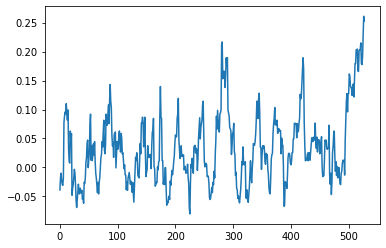

In [242]:
plt.plot(modul_list)
print(opt_grouping)
#a = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]
#{0:0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,19,21
# 1:14,15,18,20,22,23,24,25,26,27,28,29,30,31,32,33}

In [252]:
len(modul_list)

528

In [14]:
opt_grouping, opt_Q, saving_group, modul_list = annealing_simulating(G = G, initial_temp = 40, adj = n_A,n =n, cn=2,  s =s, k =k,m= m, cooling_constant = 1.0015, iteration =1200)

-0.060157790927021254
-0.06911571334648213
-0.07503287310979573
-0.06541748849441109
-0.06443129520052553
-0.06541748849441116
-0.06443129520052554
-0.06541748849441108
-0.06443129520052554
-0.05456936226166953
-0.08514135437212307
-0.08095003287310945
-0.05950032873109747
-0.05029585798816525
-0.028928336620643896
-0.03558514135437172
-0.0441321499013803
-0.055309007232083776
-0.02695595003287279
-8.218277449031816e-05
-0.017833662064431148
-0.04939184746877009
-0.02465483234713974
-0.03944773175542361
-0.043474687705456726
-0.028928336620644063
-0.023750821827744604
-0.008218277449046416
0.005588428665352039
-0.013806706114398139
-0.008875739644970234
-0.016107823800131416
-0.01314924391847467
0.01840894148586477
0.007560815253123019
0.01840894148586477
0.02038132807363603
0.01840894148586477
0.008875739644970501
0.01306706114398423
0.005588428665352011
0.034188034188034275
0.05095332018408946
0.09393491124260404
0.13379355687048045
0.1399572649572649
0.14718934911242587
0.0505424063

KeyboardInterrupt: 

In [193]:
#n, n_A, m=read_pairs_file("karate.pairs")
n,n_A,m = read_adj_file('sourcefile/karate.adj')
k = degree_matrix(n_A)
#(initial_temp, adj, s, k, m, cooling_constant, iteration)
opt_grouping, opt_Q, saving_group, modul_list = annealing_simulating(initial_temp = 40, adj = n_A,n =n, cn=2,  s =s, k =k,m= m, cooling_constant = 1.0015, iteration =20000) 

-0.08095003287310981
-0.07897764628533861
-0.08974358974358976
-0.09007232084155163
-0.05136423405654176
-0.02572320841551613
-0.0007396449704142156
-0.03846153846153847
-0.0007396449704142156
-0.002054569362261691
-0.004026955950032867
0.037475345167652836
0.01742274819197896
0.008547008547008503
-0.003944773175542402
0.008547008547008503
0.016765285996055194
0.015039447731755405
0.001890203813280724
-0.003287310979618683
-0.003287310979618673
0.0009861932938856038
-0.057938856015779104
-0.028928336620644323
-0.02005259697567389
-0.01380670611439841
-0.008218277449046702
-0.1183431952662722
-0.12064431295200524
-0.07700525969756739
-0.0641025641025641
-0.05029585798816568
-0.06114398422090731
-0.03821499013806708
-0.03558514135437214
-0.061226166995397784
-0.06385601577909274
-0.08218277449046682
-0.08678500986193297
-0.08949704142011836
-0.08752465483234714
-0.08095003287310981
-0.09541420118343197
-0.09475673898750822
-0.12261669953977644
-0.10264628533859306
-0.09475673898750823
-0

KeyboardInterrupt: 

In [4]:
opt_grouping
#a = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]
#{0:0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,19,21
# 1:14,15,18,20,22,23,24,25,26,27,28,29,30,31,32,33}

NameError: name 'opt_grouping' is not defined

## Simulated Annealing

In [160]:
def annealing_simulating(initial_temp, adj,n, cn,  s, k, m, cooling_constant, iteration) :
    
    svg_group_list = []
    modul_list = []
    old_Q = None
    group_list = None
    for i in range(iteration) :
        
        temp = new_temp(cooling_constant, initial_temp, i)
        acceptance = False 
        num_rejection = -1
        #n numberof nodes, cn constrained number of groups
        rej_threshold = cal_rej_thres(n,cn)
        #print(rej_threshold)
        
        while acceptance is False :
            
            num_rejection +=1
            #print(old_Q)
            
            #when the very first
            if old_Q is None :
                node_list , group_list = initial_grouping(n,cn)
                s = partition_matrix(group_list)
                old_Q = get_modularity(adj, s, k, m)
                
            
            # patching new grouping list
            new_grouping = patching(group_list, cn)
            #print(new_grouping)
            
            # new grouping matrix
            new_s = partition_matrix(new_grouping)
            
            # new modularity with new grouping matrix
            new_Q = get_modularity(adj,new_s,k,m)
            #print(new_Q)
            
            acceptance = check_acceptance(old_Q, new_Q, temp)
            
            #print(acceptance)
            #print(num_rejection)
            if num_rejection > rej_threshold:
                break
            
            
            if acceptance is True :
                
                #if new_grouping in svg_group_list :
                    #acceptance = False
                #else :
                svg_group_list.append(new_grouping)
                modul_list.append(new_Q)
                #print(modul_list[-1])
                old_Q = new_Q
                group_list = new_grouping
                
    opt = max(modul_list)
    idx_opt = modul_list.index(opt)
    
    opt_group = svg_group_list[idx_opt]
    
    opt_grouping = svg_format(opt_group) 
    opt_Q = opt
    
    return opt_grouping, opt_Q, svg_group_list, modul_list
            
        
        

## Getting modularity 

In [183]:
# s = partition matrix, k = degree matrix , m = number of edge 
m = (sumit/2)

def get_modularity(adj, s, k, m ):
    
    # formula modularity = (Adj * p_matrix - (d_matrix)^2 * p_matrix/2m) / 2m 
    
    adj_partition  = (s* adj *s.transpose()).diagonal().sum()
    deg_par = np.array(s*k)
    degree_partition = np.square(deg_par).sum()/(2*m) 
    
    #modularity
    Q = (adj_partition - degree_partition) /(2*m)
    
    return Q
    

78.0


## Degree matrix

In [ ]:
def degree_matrix(adj) :
    d_mat = n_A.sum(axis=1)
    return d_mat

## Initial grouping

In [11]:
#n is number of elements, cn, constrainumber
def initial_grouping(n,cn):
    
    
    #get list of nodes
    nodes = [node for node in range(0,n)]
    
    #assign group number to each nodes
    group_assign = [random.randrange(0,cn) for g_num in range(len(nodes))]
    
    return nodes, group_assign
    

## Getting S(Partition matrix) 

In [15]:
def partition_matrix(partition) :
    print(partition)
    n = len(partition)
    data= np.ones(n)
    print(data)
    ij = np.array([partition, list(range(0,n))])
    print(ij)
    grouping_matrix = sp.csr_matrix((data,ij))
    return grouping_matrix

## Saving format for checking group easily

In [172]:
def svg_format(group_list):
    fin_set ={}
    for idx, gnum in enumerate(group_list):
        if gnum in fin_set :
            fin_set[gnum].append(idx)
        else :
            fin_set[gnum] =[idx]
    return fin_set

## Pathcing the group move singe node into other groups

In [1]:
def patching(group_list, cn) :
    
    n_nodes =len(group_list)
    #cn is constrained number of groups
    n_groups = cn
    #get index and value that want to change
    
    idx = random.choice([x for x in range(0, n_nodes)])
    val = group_list[idx]
    
    n_val = random.choice([y for y in range(0, n_groups) if y != val])
    
    group_list[idx] = n_val
    patched_group = group_list
    
    return patched_group
    